In [21]:
import numpy as np
import pandas as pd
import os
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Classifier Random Forest
from sklearn.ensemble import RandomForestClassifier

#Classifier k-NN (K Nearest Neighbour)
from sklearn.neighbors import KNeighborsClassifier

#Classifier Decision Tree Classifier
from sklearn import tree

#Classifier Logistic regression
from sklearn.linear_model import LogisticRegression

#Classifier Principal Component Analysis
from sklearn.decomposition import PCA


In [17]:
import pandas as pd

# Load a CSV file
df = pd.read_csv('/content/Iris.csv')

In [5]:
df = pd.read_csv('/content/Iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df=df.drop(columns = ['Id'])
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: >

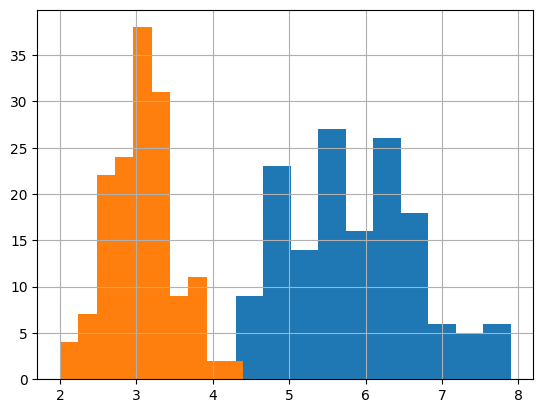

In [8]:
df['SepalLengthCm'].hist()
df['SepalWidthCm'].hist()

<Axes: >

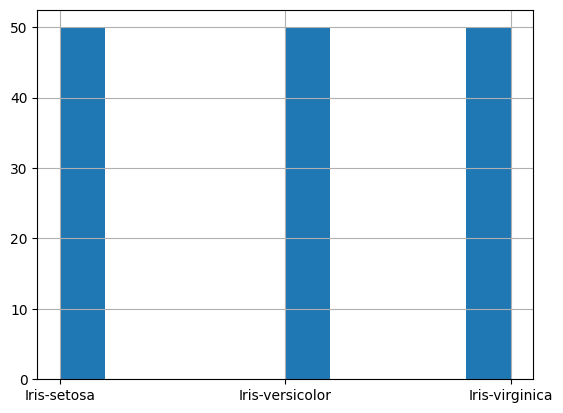

In [9]:
df['Species'].hist()

<Axes: >

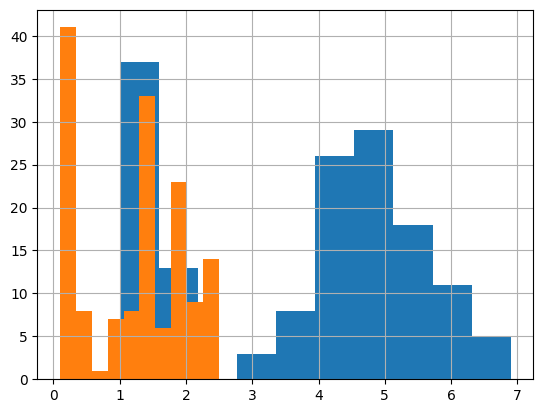

In [10]:
df['PetalLengthCm'].hist()
df['PetalWidthCm'].hist()

In [13]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Species'] = lb.fit_transform(df['Species'])
print(df['Species'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


In [14]:
Y = df['Species']
Y = np.array(Y)
print(Y)
X = df.drop(columns=['Species'])
X = np.array(X)
print(X)
print(Y.shape)
print(X.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30)
print(X_train)

[[5.8 4.  1.2 0.2]
 [5.6 2.9 3.6 1.3]
 [5.2 3.5 1.5 0.2]
 [5.7 3.  4.2 1.2]
 [5.8 2.7 4.1 1. ]
 [6.1 3.  4.6 1.4]
 [6.3 2.3 4.4 1.3]
 [7.7 3.8 6.7 2.2]
 [4.9 3.  1.4 0.2]
 [4.8 3.4 1.9 0.2]
 [6.7 3.1 5.6 2.4]
 [6.3 2.7 4.9 1.8]
 [5.1 3.5 1.4 0.2]
 [6.7 3.1 4.4 1.4]
 [5.  3.6 1.4 0.2]
 [5.1 3.3 1.7 0.5]
 [5.6 2.8 4.9 2. ]
 [5.5 2.3 4.  1.3]
 [4.6 3.1 1.5 0.2]
 [5.5 4.2 1.4 0.2]
 [6.4 3.1 5.5 1.8]
 [5.1 3.8 1.6 0.2]
 [4.4 2.9 1.4 0.2]
 [4.8 3.4 1.6 0.2]
 [7.2 3.2 6.  1.8]
 [6.6 2.9 4.6 1.3]
 [5.  3.3 1.4 0.2]
 [6.5 3.  5.8 2.2]
 [4.8 3.  1.4 0.1]
 [7.9 3.8 6.4 2. ]
 [5.7 3.8 1.7 0.3]
 [6.4 2.8 5.6 2.1]
 [4.6 3.4 1.4 0.3]
 [6.  3.  4.8 1.8]
 [6.9 3.2 5.7 2.3]
 [5.2 3.4 1.4 0.2]
 [6.7 3.  5.2 2.3]
 [5.6 2.5 3.9 1.1]
 [4.9 2.4 3.3 1. ]
 [4.7 3.2 1.3 0.2]
 [5.8 2.6 4.  1.2]
 [5.7 2.9 4.2 1.3]
 [6.4 3.2 5.3 2.3]
 [5.  3.4 1.5 0.2]
 [4.4 3.2 1.3 0.2]
 [6.8 2.8 4.8 1.4]
 [6.3 2.5 4.9 1.5]
 [7.2 3.6 6.1 2.5]
 [6.  2.7 5.1 1.6]
 [5.7 2.8 4.1 1.3]
 [6.1 2.8 4.7 1.2]
 [5.  3.4 1.6 0.4]
 [4.9 3.1 1.

In [22]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
print("Accuracy: ", model.score(X_test,Y_test)*100)

Accuracy:  97.77777777777777
